In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [78]:
import pandas as pd

import os

result_dfs = []
for path in os.listdir('./query_results'):
    result_dfs.append(pd.read_csv(os.path.join('./query_results/',path), index_col='Id'))

df = pd.concat(result_dfs)
df


,Title,Body,Tags,Score,ViewCount,AnswerCount,nbtags
Id,,,,,,,
56876342,Chrome Save as PDF changing CJK characters,<p>We are seeing an issue when we try to save ...,<html><google-chrome><pdf><unicode>,9,862,1,4
56876620,Unsure how to use colormap with Folium marker ...,"<p>I have a dataframe with latitude, longitude...",<python><pandas><colormap><folium>,10,11855,1,4
56876783,How to correctly import BillingResponse with n...,<p>I'm upgrading my version of android billing...,<java><android><gradle><in-app-billing>,9,2630,2,4
56876817,PytestDeprecationWarning at test setup: the fu...,"<p>Following tutorial on <a href=""https://test...",<python><django><pytest><django-channels>,7,1340,1,4
56876823,Put the legend of pandas bar plot with seconda...,<p>I have a pandas DataFrame with a secondary ...,<python><pandas><matplotlib><plot><jupyter-not...,6,1474,1,5
...,...,...,...,...,...,...,...
38926965,"Invalid VirtualBox parameter ""–cpuidset""",<p>I want to add the OS X El Capitan to my Vir...,<macos><cmd><virtual-machine><virtualbox>,7,14522,3,4
38927124,Computing Signature/Hash in Javascript and hav...,<p>I have the following code in C#</p>\n\n<pre...,<javascript><c#><hash><sha256><cryptojs>,7,4197,1,5
38927230,"Panda AssertionError columns passed, passed da...",<p>I am working on Azure ML implementation on ...,<python><pandas><dataframe><nltk><azure-machin...,7,53272,1,5


In [79]:
df['tag_set'] = df.Tags.apply(lambda x: set(x[1:-1].split('><')))
df['tag_list'] = df.Tags.apply(lambda x: x[1:-1].split('><'))


In [80]:
df.tag_list


Id
56876342                  [html, google-chrome, pdf, unicode]
56876620                   [python, pandas, colormap, folium]
56876783              [java, android, gradle, in-app-billing]
56876817            [python, django, pytest, django-channels]
56876823    [python, pandas, matplotlib, plot, jupyter-not...
                                  ...                        
38926965            [macos, cmd, virtual-machine, virtualbox]
38927124             [javascript, c#, hash, sha256, cryptojs]
38927230    [python, pandas, dataframe, nltk, azure-machin...
38927267    [spring, spring-mvc, spring-security, spring-b...
38927302    [android, android-layout, android-studio, mate...
Name: tag_list, Length: 536179, dtype: object

<AxesSubplot:ylabel='Frequency'>

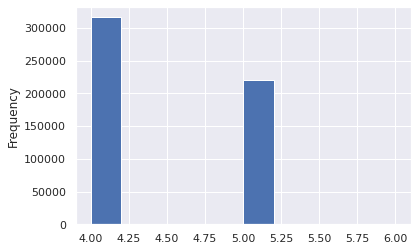

In [81]:
df.nbtags.plot.hist()

In [82]:
stack = df.tag_list.apply(pd.Series).stack()
stack


Id         
56876342  0                       html
          1              google-chrome
          2                        pdf
          3                    unicode
56876620  0                     python
                        ...           
38927302  0                    android
          1             android-layout
          2             android-studio
          3            material-design
          4    android-support-library
Length: 2364694, dtype: object

<AxesSubplot:>

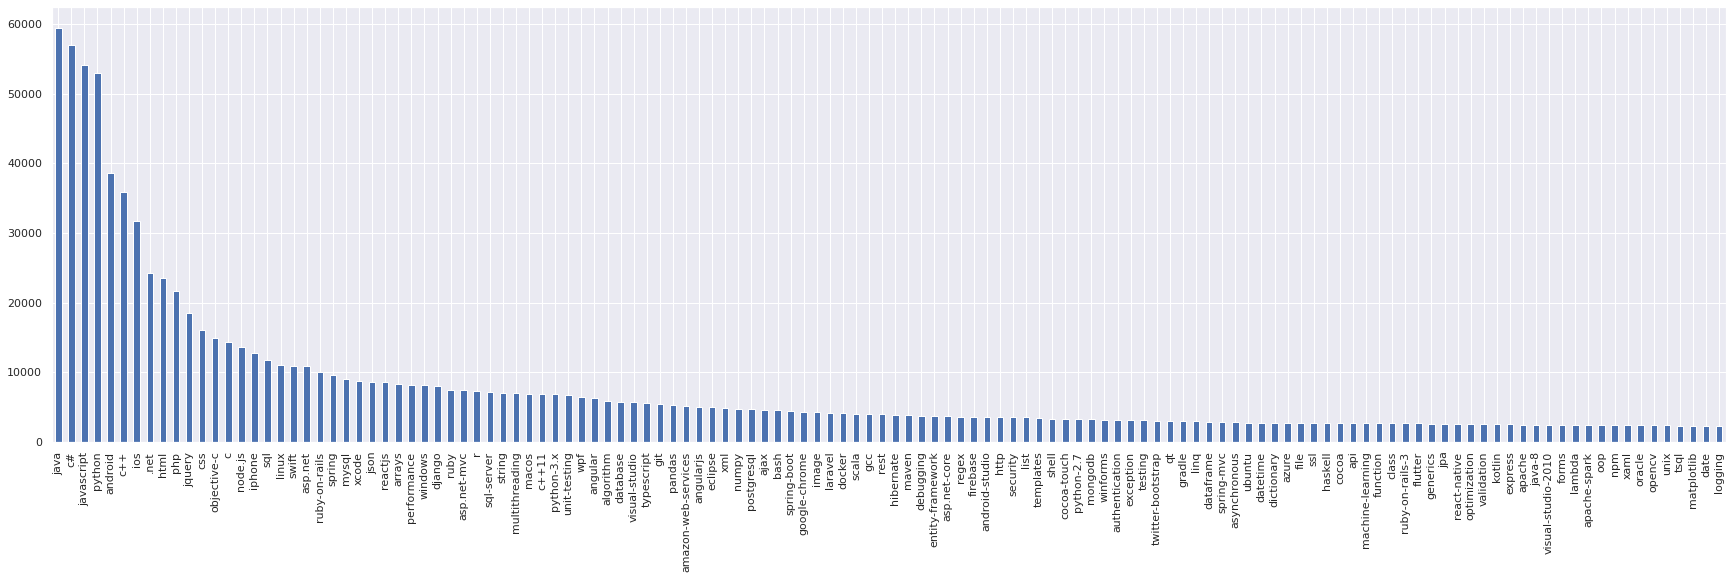

In [83]:
stack.value_counts().iloc[0:128].plot.bar(figsize=(30,8))

In [84]:
from bs4 import BeautifulSoup
from markdown import markdown

def get_text_and_code(body):
    html = markdown(body)
    bs = BeautifulSoup(html)
    codes = bs.findAll('code')
    code = '\n'.join([x.text for x in codes])
    for x in codes:
        x.decompose()
    text = '\n'.join(bs.findAll(text=True))
    return pd.Series({"text":text, "code":code})
df = df.join(df.Body.apply(get_text_and_code))

In [85]:
df.isna().sum()

Title          0
Body           0
Tags           0
Score          0
ViewCount      0
AnswerCount    0
nbtags         0
tag_set        0
tag_list       0
text           0
code           0
dtype: int64

In [86]:
df.to_csv("./questions_with_tags_texts_codes.csv")

In [87]:
selected_tags = set(stack.value_counts().iloc[0:16].index)

In [88]:
sample_df = pd.concat([df[df.tag_list.apply(lambda x: tag in x)].sample(
    10000) for tag in selected_tags])
sample_df.tag_set = sample_df.tag_set.astype(str)
sample_df.tag_list = sample_df.tag_list.astype(str)
sample_df.drop_duplicates(inplace=True)
sample_df.tag_set = sample_df.tag_set.apply(eval)
sample_df.tag_list = sample_df.tag_list.apply(eval)
sample_df

,Title,Body,Tags,Score,ViewCount,AnswerCount,nbtags,tag_set,tag_list,text,code
Id,,,,,,,,,,,
44528304,Performance impact of calling CreateIfNotExist...,<p>Should I call <code>CreateIfNotExistsAsync(...,<c#><.net><azure><azure-queues>,8,1148,1,4,"{c#, azure, .net, azure-queues}","[c#, .net, azure, azure-queues]",Should I call \n before every read/write on Az...,CreateIfNotExistsAsync()\n.Net
15388230,Linq To SQL: Sort Query by Arbitrary Property(...,"<p>I have a larger/more complex problem, but f...",<c#><linq><c#-4.0><linq-to-sql>,15,20492,3,4,"{c#, linq-to-sql, c#-4.0, linq}","[c#, linq, c#-4.0, linq-to-sql]","I have a larger/more complex problem, but for ...",IQueryable<Product> query = from p in db.Produ...
3579246,How to use distinct with group by in Linq to SQL,<p>I'm trying to convert the following sql to ...,<c#><.net><linq><linq-to-sql>,12,26572,5,4,"{c#, linq-to-sql, linq, .net}","[c#, .net, linq, linq-to-sql]",I'm trying to convert the following sql to Lin...,"select groupId, count(distinct(userId)) from p..."
27467600,Why is coupling to dependencies with the new k...,<p>I've been using Dependency Injection for a ...,<c#><dependency-injection><inversion-of-contro...,6,1325,1,4,"{c#, inversion-of-control, decoupling, depende...","[c#, dependency-injection, inversion-of-contro...",I've been using Dependency Injection for a whi...,private IMyInterface _instance = new MyImpleme...
37554540,F# list to C# IEnumerable: most efficient method?,<p>I'm currently working on an F# library with...,<c#><.net><list><f#><seq>,12,2098,1,5,"{c#, list, seq, f#, .net}","[c#, .net, list, f#, seq]",I'm currently working on an F# library with GU...,[1; 2; 3; 4; 5;] |> List.toSeq\n\n[1; 2; 3; 4;...
...,...,...,...,...,...,...,...,...,...,...,...
20999798,Using same version number for multiple Xcode t...,<p>I have a single Xcode project with multiple...,<ios><iphone><objective-c><xcode><plist>,9,1966,2,5,"{iphone, objective-c, plist, xcode, ios}","[ios, iphone, objective-c, xcode, plist]",I have a single Xcode project with multiple ta...,Info.plist\nCFBundleVersion\nCFBundleShortVers...
9438009,iOS Textures Taking 33% Extra Memory,<p>I was testing my iOS game and noticed a dis...,<ios><memory><opengl-es><textures>,9,2210,2,4,"{textures, memory, ios, opengl-es}","[ios, memory, opengl-es, textures]",I was testing my iOS game and noticed a discre...,int PlatformIOS::GetProcessMemUsage()\n{\n ...
13875428,how to access from UICollectionViewCell the in...,<p>i want to animate the <code>UICollectionVie...,<ios><ibaction><uicollectionview><nsindexpath>...,21,63951,13,5,"{uicollectionview, ibaction, nsindexpath, ios,...","[ios, ibaction, uicollectionview, nsindexpath,...",i want to animate the \n when action is called...,UICollectionViewCell\nUICollectionViewCell\nIn...


In [89]:
from sklearn.model_selection import train_test_split
import numpy as np
import json
def split_data(dataframe):
    df_to_split, df_validation, = train_test_split(
        dataframe, test_size=0.1)
    df_train, df_test = train_test_split(
        df_to_split, test_size=0.17)
    return df_train, df_test, df_validation


In [90]:
sample_train, sample_test, sample_validation = split_data(
    sample_df)

# sample_train.to_csv('./train.csv', index=False)
# sample_test.to_csv('./test.csv', index=False)
# sample_validation.to_csv('./validation.csv', index=False)
with open("selected_tags.json", "w") as outfile:
   json.dump(list(selected_tags), outfile)


Total data:
(141144, 11)


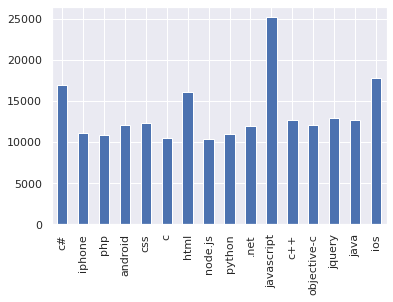

In [91]:
print("Total data:")
print(sample_df.shape)
tag_df = pd.DataFrame()
for tag in selected_tags:
    tag_df[tag] = sample_df.tag_set.apply(
        lambda x: 1 if tag in x else 0)
tag_df.loc[:, list(selected_tags)].sum().plot.bar();



Training set:
(105434, 11)


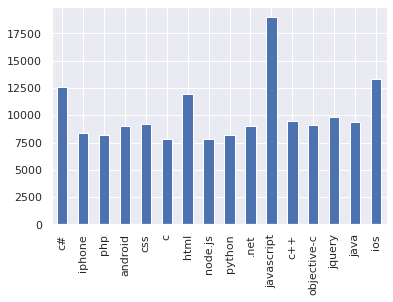

In [92]:

print("Training set:")
print(sample_train.shape)
tag_df = pd.DataFrame()
for tag in selected_tags:
    tag_df[tag] = sample_train.tag_set.apply(
        lambda x: 1 if tag in x else 0)
tag_df.loc[:, list(selected_tags)].sum().plot.bar();


Test set:
(21595, 11)


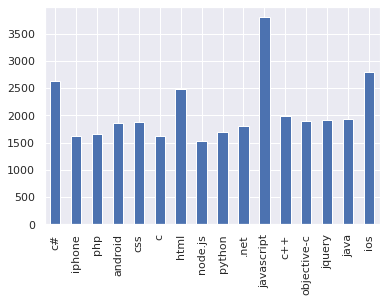

In [93]:


print("Test set:")
print(sample_test.shape)
tag_df = pd.DataFrame()
for tag in selected_tags:
    tag_df[tag] = sample_test.tag_set.apply(
        lambda x: 1 if tag in x else 0)
tag_df.loc[:, list(selected_tags)].sum().plot.bar();


Validation set:
(14115, 11)


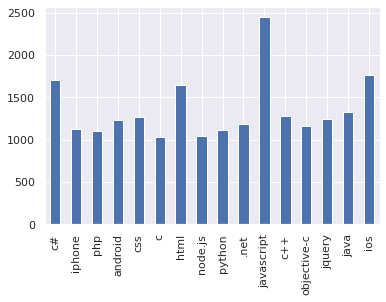

In [94]:

print("Validation set:")
print(sample_validation.shape)
tag_df = pd.DataFrame()
for tag in selected_tags:
    tag_df[tag] = sample_validation.tag_set.apply(
        lambda x: 1 if tag in x else 0)
tag_df.loc[:, list(selected_tags)].sum().plot.bar();


In [95]:
from sklearn.model_selection import train_test_split
import spacy
from tqdm.notebook import tqdm
import numpy as np
from thinc.api import set_gpu_allocator, require_gpu
set_gpu_allocator("pytorch")
require_gpu(0)
nlp = spacy.load('en_core_web_lg')


def preprocess(texts):
    removal = ['ADV', 'PRON', 'CCONJ', 'PUNCT',
               'PART', 'DET', 'ADP', 'SPACE', 'NUM', 'SYM']
    tokens = []
    cleaned_texts = []
    print("preprocessing")
    for summary in tqdm(nlp.pipe(texts, disable=["tok2vec"]), total=len(texts)):
        question_tokens = []
        for token in summary:
            if token.pos_ not in removal and not token.is_stop and token.is_alpha:
                question_tokens.append(token.lemma_)
        cleaned_texts.append(" ".join(question_tokens))
    # question_tokens = [token.lemma_ for token in summary if token.pos_ not in removal and not token.is_stop and token.is_alpha]
    return cleaned_texts


sample_df["preprocessed_text"] = preprocess(sample_df.text)
sample_df["preprocessed_code"] = preprocess(sample_df.code)


preprocessing


  0%|          | 0/141144 [00:00<?, ?it/s]

preprocessing


  0%|          | 0/141144 [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 126.00 MiB (GPU 0; 7.77 GiB total capacity; 1.66 GiB already allocated; 100.81 MiB free; 1.68 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

<AxesSubplot:>

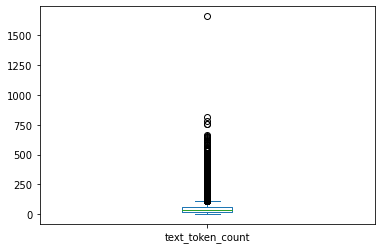

In [ ]:
sample_df["text_token_count"] = sample_df["preprocessed_text"].apply(
    lambda x: len(x.split(" ")))
sample_df["text_token_count"].plot.box()


<AxesSubplot:>

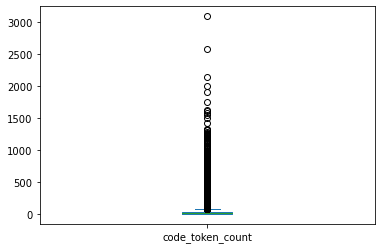

In [ ]:
sample_df["code_token_count"] = sample_df["preprocessed_code"].apply(
    lambda x: len(x.split(" ")))
sample_df["code_token_count"].plot.box()


<AxesSubplot:>

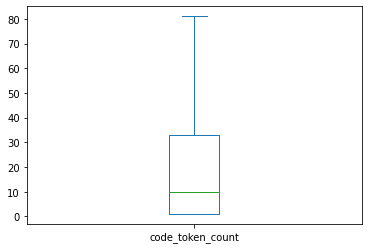

In [ ]:
sample_df["code_token_count"].plot.box(showfliers=False)


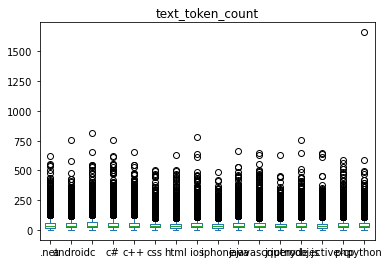

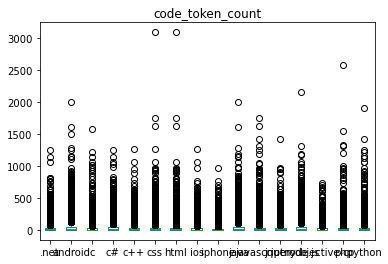

In [ ]:
for tag in selected_tags:
    sample_df[tag] = sample_df.tag_set.apply(lambda x: 1 if tag in x else 0)
res = []
for tag in selected_tags:
    tag_df = sample_df[sample_df[tag]==1].loc[:]
    tag_df["tag"] = tag
    res.append(tag_df)

dup_df = pd.concat(res, ignore_index=True)

dup_df.plot.box(column="text_token_count", by="tag");
dup_df.plot.box(column="code_token_count", by="tag");

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)
tfidf_vec_text = ctf.fit(sample_train["preprocessed_text"])
text_tf = tfidf_vec_text.transform(sample_df["preprocessed_text"])


In [ ]:
text_tf.shape

(141074, 93071)

In [ ]:
sample_train["preprocessed_text"] = preprocess(sample_train.text)
sample_test["preprocessed_text"] = preprocess(sample_test.text)

preprocessing


  0%|          | 0/105381 [00:00<?, ?it/s]

preprocessing


  0%|          | 0/21585 [00:00<?, ?it/s]

In [ ]:
sample_validation["preprocessed_text"] = preprocess(sample_validation.text)


preprocessing


  0%|          | 0/14108 [00:00<?, ?it/s]

In [ ]:
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)
tfidf_vec_text = ctf.fit(sample_train["preprocessed_text"])
text_train_tf = tfidf_vec_text.transform(sample_train["preprocessed_text"])
text_test_tf = tfidf_vec_text.transform(sample_test["preprocessed_text"])
text_val_tf = tfidf_vec_text.transform(sample_validation["preprocessed_text"])


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

sample_train.tag_list = sample_train.tag_list.apply(
    lambda tag_list: [tag for tag in tag_list if tag in selected_tags])
sample_test.tag_list = sample_test.tag_list.apply(
    lambda tag_list: [tag for tag in tag_list if tag in selected_tags])
sample_validation.tag_list = sample_validation.tag_list.apply(
    lambda tag_list: [tag for tag in tag_list if tag in selected_tags])

mlb = MultiLabelBinarizer()
mlb.fit(sample_train.tag_list.values)
y_train = mlb.transform(sample_train.tag_list.values)
y_train_sets = sample_train.tag_list.apply(set)


In [ ]:
from sklearn.datasets import make_multilabel_classification
import numpy as np
from xgboost import XGBClassifier

clf = XGBClassifier(tree_method="hist")
clf.fit(text_train_tf, y_train)

AssertionError: 
Not equal to tolerance rtol=1e-07, atol=0

Mismatched elements: 79823 / 1686096 (4.73%)
Max absolute difference: 1.
Max relative difference: 1.
 x: array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],...
 y: array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],...

In [ ]:
from sklearn.metrics import roc_auc_score, jaccard_score
y_val = mlb.transform(sample_validation.tag_list.values)
y_val_sets = sample_train.tag_list.apply(set)
y_pred = clf.predict(text_val_tf)
print("Roc auc for each tag:")
print(list(zip(mlb.classes_, roc_auc_score(y_val, y_pred, average=None))))
print(
    f"Text roc auc macro average: {roc_auc_score(y_val, y_pred, average='macro')}")
print(
    f"Jaccard score sample average: {jaccard_score(y_val, y_pred, average='samples')}")


Roc auc for each tag:
[('.net', 0.6149269586073648), ('android', 0.853368769029291), ('c', 0.7016890501560509), ('c#', 0.6648779077179782), ('c++', 0.6997904037667919), ('css', 0.8327694606771902), ('html', 0.7436814110489844), ('ios', 0.7691045071558211), ('iphone', 0.6858620246989654), ('java', 0.7655011563871432), ('javascript', 0.7479108957284503), ('jquery', 0.7788615747085867), ('node.js', 0.810209620743972), ('objective-c', 0.645590875582382), ('php', 0.8149517952719355), ('python', 0.8462869088339147)]
Text roc auc macro average: 0.7484614575071764
Jaccard score sample average: 0.48052287118419806


In [ ]:
from sklearn.decomposition import PCA
n_components = text_train_tf.shape[1]-1
pca = PCA(n_components=n_components)
pca.fit(text_train_tf)
explained_variance_percentage = (pca.explained_variance_ratio_*100).round(2)
explained_variance_percentage_cum = explained_variance_percentage.cumsum().round()
x_list = range(1, n_components+1)
list(x_list)
fig, ax = plt.subplots(figsize=(10, 8))
plt.bar(x_list, explained_variance_percentage)
plt.plot(x_list, explained_variance_percentage_cum, c="red", marker='o')
plt.xlabel("Principal component index")
plt.ylabel("Explained variance percentage")
plt.title("Explained variance")
plt.show(block=False)


TypeError: PCA does not support sparse input. See TruncatedSVD for a possible alternative.

latent semantic analysis (LSA).
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html

In [ ]:
from sklearn.decomposition import TruncatedSVD
n_components = 100
svd = TruncatedSVD(n_components=n_components, n_iter=7, random_state=42)
svd.fit(text_train_tf)


TruncatedSVD(n_components=100, n_iter=7, random_state=42)

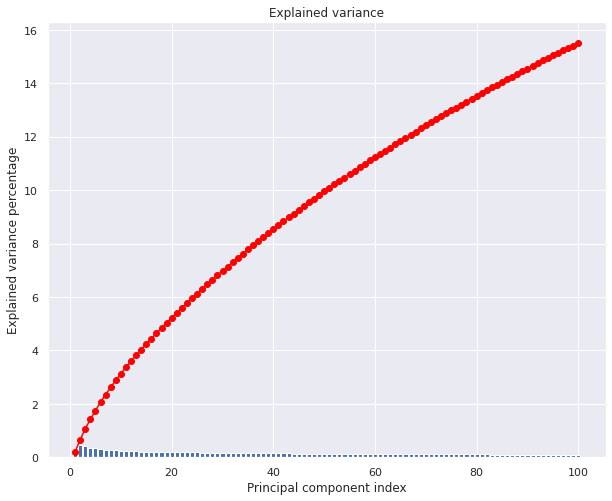

In [ ]:

explained_variance_percentage = (svd.explained_variance_ratio_*100).round(2)
explained_variance_percentage_cum = explained_variance_percentage.cumsum()
x_list = range(1, n_components+1)
fig, ax = plt.subplots(figsize=(10, 8))
plt.bar(x_list, explained_variance_percentage)
plt.plot(x_list, explained_variance_percentage_cum, c="red", marker='o')
plt.xlabel("Principal component index")
plt.ylabel("Explained variance percentage")
plt.title("Explained variance")
plt.show(block=False)


https://towardsdatascience.com/latent-semantic-analysis-intuition-math-implementation-a194aff870f8

<AxesSubplot:>

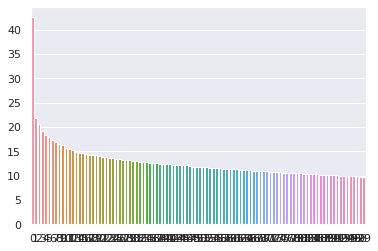

In [ ]:
Sigma = svd.singular_values_
V_T = svd.components_.T
sns.barplot(x=list(range(len(Sigma))), y=Sigma)


In [ ]:
term_topic_matrix = pd.DataFrame(data=V_T,
                                 index=tfidf_vec_text.get_feature_names(),
                                 columns = [f'Latent_concept_{r}' for r in range(0,V_T.shape[1])])

/home/aurelien/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


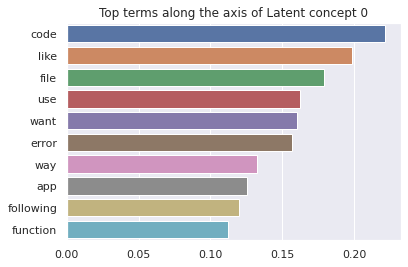

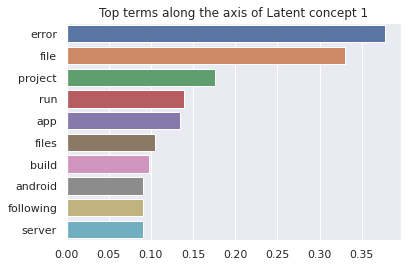

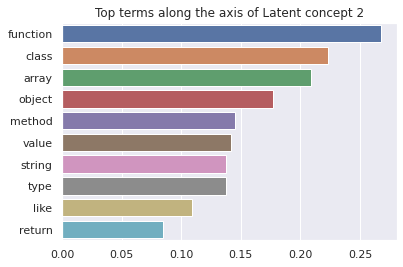

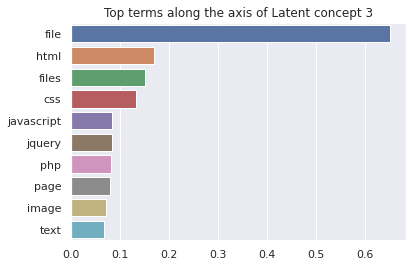

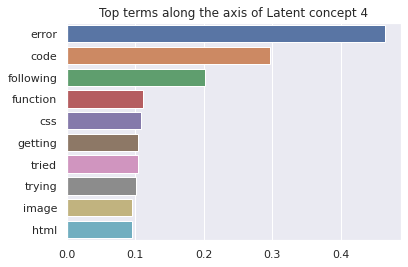

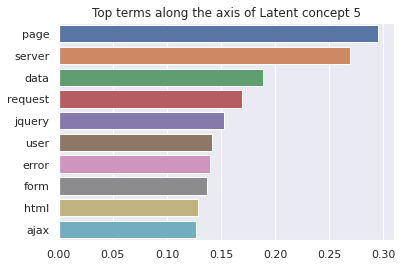

In [ ]:
for i in range(6):
    data = term_topic_matrix[f'Latent_concept_{i}']
    data = data.sort_values(ascending=False)
    top_10 = data[:10]
    plt.title(f'Top terms along the axis of Latent concept {i}')
    sns.barplot(x=top_10.values, y=top_10.index);
    plt.show()

In [ ]:
text_train_tf_t = svd.transform(text_train_tf)
clf = XGBClassifier(tree_method="hist")
clf.fit(text_train_tf_t, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
text_val_tf_t = svd.transform(text_val_tf)
y_pred = clf.predict(text_val_tf_t)
print("Roc auc for each tag:")
print(list(zip(mlb.classes_, roc_auc_score(y_val, y_pred, average=None))))
print(
    f"Text roc auc macro average: {roc_auc_score(y_val, y_pred, average='macro')}")
print(
    f"Jaccard score sample average: {jaccard_score(y_val, y_pred, average='samples')}")


Roc auc for each tag:
[('.net', 0.5648831212504749), ('android', 0.791276281926678), ('c', 0.6755776205196206), ('c#', 0.5957797703359107), ('c++', 0.6583240427622887), ('css', 0.8146841247006404), ('html', 0.7421216042368513), ('ios', 0.7418554593974642), ('iphone', 0.6340576993846654), ('java', 0.6863344897204766), ('javascript', 0.7109926243679436), ('jquery', 0.7506753880543879), ('node.js', 0.7050887556040227), ('objective-c', 0.5925767349370967), ('php', 0.7247434563024959), ('python', 0.7410646957886372)]
Text roc auc macro average: 0.6956272418306035
Jaccard score sample average: 0.37182804082789905
